# **Sentiment Analysis on Uber Customer Reviews Dataset (2024) by Machine Learning and Deep Learning**

## **Dataset:**
1.   content: 評論
2.   score: 評分(0-5分)
3.   thumbsUpCount: 這則評論獲得了幾個讚
4.    reviewCreatedVersion: 評論產生時的APP版本
5.    at: 評論時間







In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack


In [ ]:
df = pd.read_csv('/content/uber_reviews_without_reviewid.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


刪除缺失資料過多的欄位，本資料集"userName"不會使用故刪除，"appversion"同"reviewCreatedVersion"故刪除。

In [ ]:
df = df.drop(columns=['userName','userImage','replyContent','repliedAt','appVersion'])
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Good,5,0,4.556.10005,2024-12-18 17:17:19
1,Nice,5,0,4.556.10005,2024-12-18 17:17:17
2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42
3,Good,4,0,4.556.10005,2024-12-18 17:08:27
4,exllence,5,0,4.556.10005,2024-12-18 17:08:16


In [ ]:
df.describe()

,score,thumbsUpCount
count,12000.000000,12000.000000
mean,3.925417,0.517000
std,1.658940,6.298268
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,239.000000


# **Data Visualization**

# **content**

列出uber評論中的前15大高頻詞

          word  freq
0         good  3191
1         uber  2189
2          app  1891
3       driver  1559
4      service  1512
5         ride  1414
6         nice  1086
7         time   972
8      drivers   926
9        great   737
10  experience   718
11   excellent   546
12        best   522
13         use   517
14        trip   440


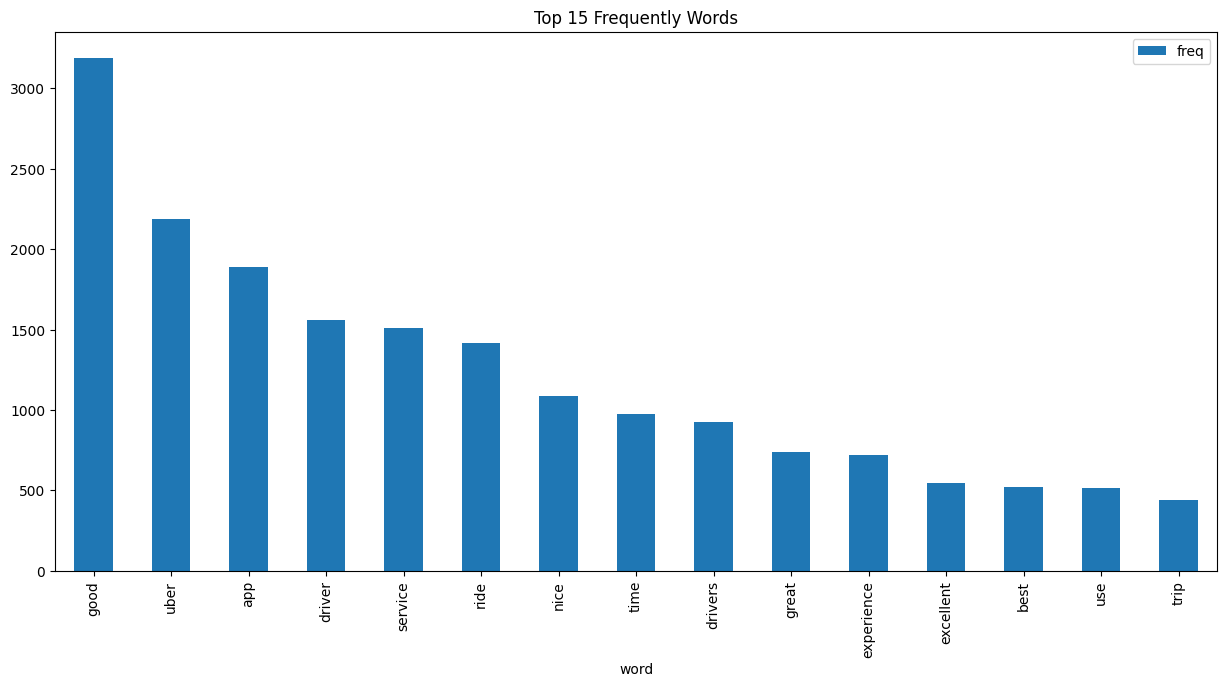

In [ ]:
# 高頻詞
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english') # 停頓詞
words = cv.fit_transform(df.content)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Top 15 Frequently Words")
print(frequency.head(15))

Text(0.5, 1.0, 'WordCloud')

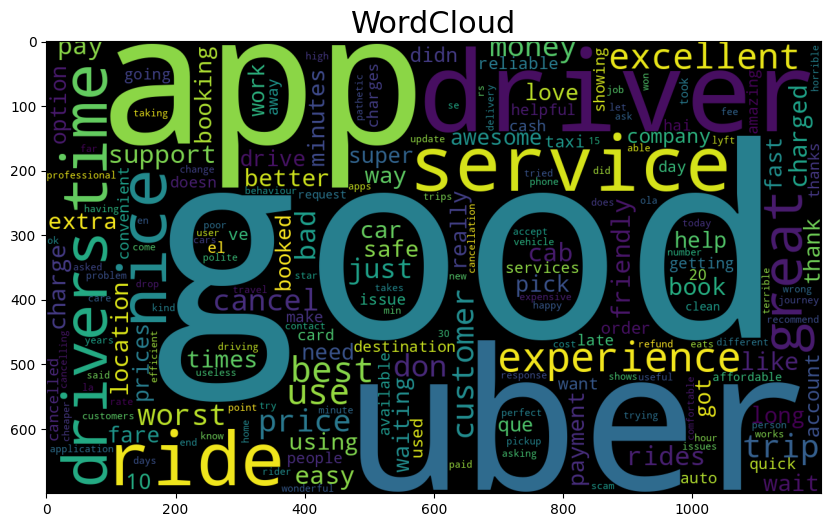

In [ ]:
# 文字雲
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 700).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud", fontsize = 22)

由於無法單就文字雲中的詞語來判斷是正面或負面詞，因此將另外分別繪製正、負面評論(定義score<4為負面評分)的高頻詞。

In [ ]:
df['feedback'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)
df['feedback'].head()

,feedback
0,1
1,1
2,1
3,1
4,1


In [ ]:
# 評分>=4時定義為正面，反之則為負
positive = df[df['feedback'] == 1]
p = len(positive)
negative = df[df['feedback'] == 0]
n = len(negative)

Text(0.5, 1.0, 'Positive WordCloud')

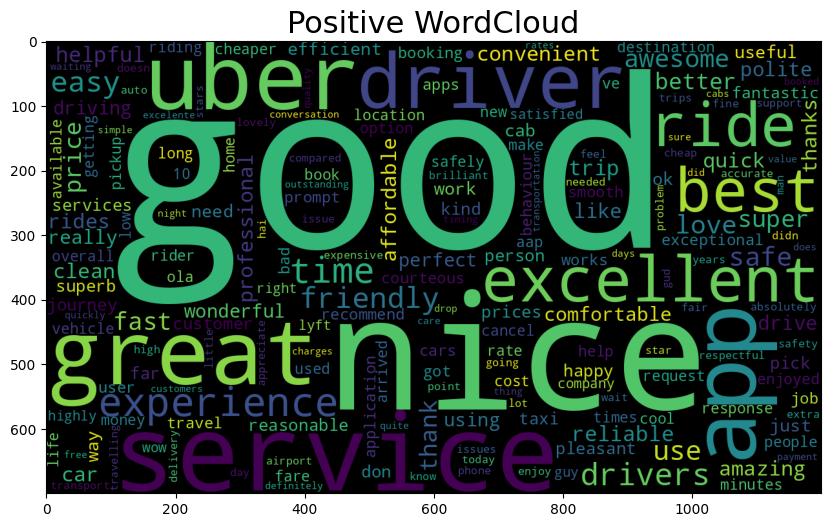

In [ ]:
# 正面評價的文字雲
pos_words = cv.fit_transform(positive.content)
sum_words = pos_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
wordcloud = WordCloud(width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Positive WordCloud", fontsize = 22)

          word  freq
0         good  3191
1         uber  2189
2          app  1891
3       driver  1559
4      service  1512
5         ride  1414
6         nice  1086
7         time   972
8      drivers   926
9        great   737
10  experience   718
11   excellent   546
12        best   522
13         use   517
14        trip   440


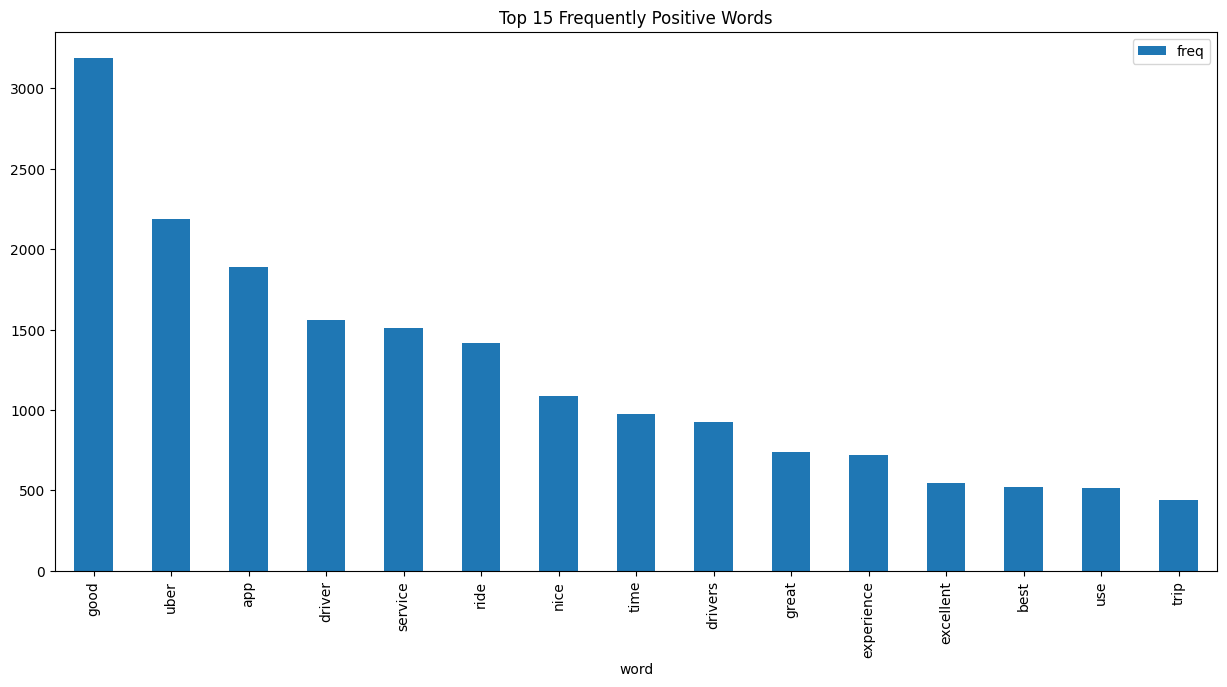

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Top 15 Frequently Positive Words")
print(frequency.head(15))

Text(0.5, 1.0, 'Negative WordCloud')

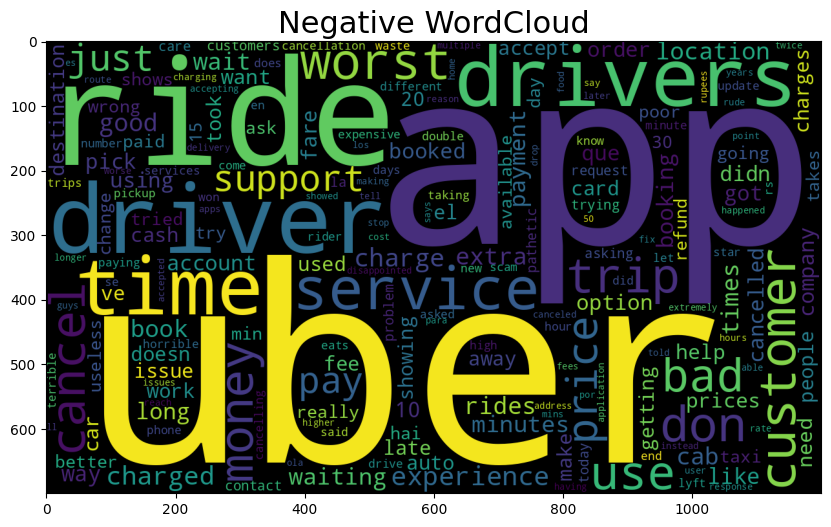

In [ ]:
# 負面評價的文字雲
negative_words = cv.fit_transform(negative.content)
sum_words = negative_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
wordcloud = WordCloud(width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Negative WordCloud", fontsize = 22)

          word  freq
0         good  3191
1         uber  2189
2          app  1891
3       driver  1559
4      service  1512
5         ride  1414
6         nice  1086
7         time   972
8      drivers   926
9        great   737
10  experience   718
11   excellent   546
12        best   522
13         use   517
14        trip   440


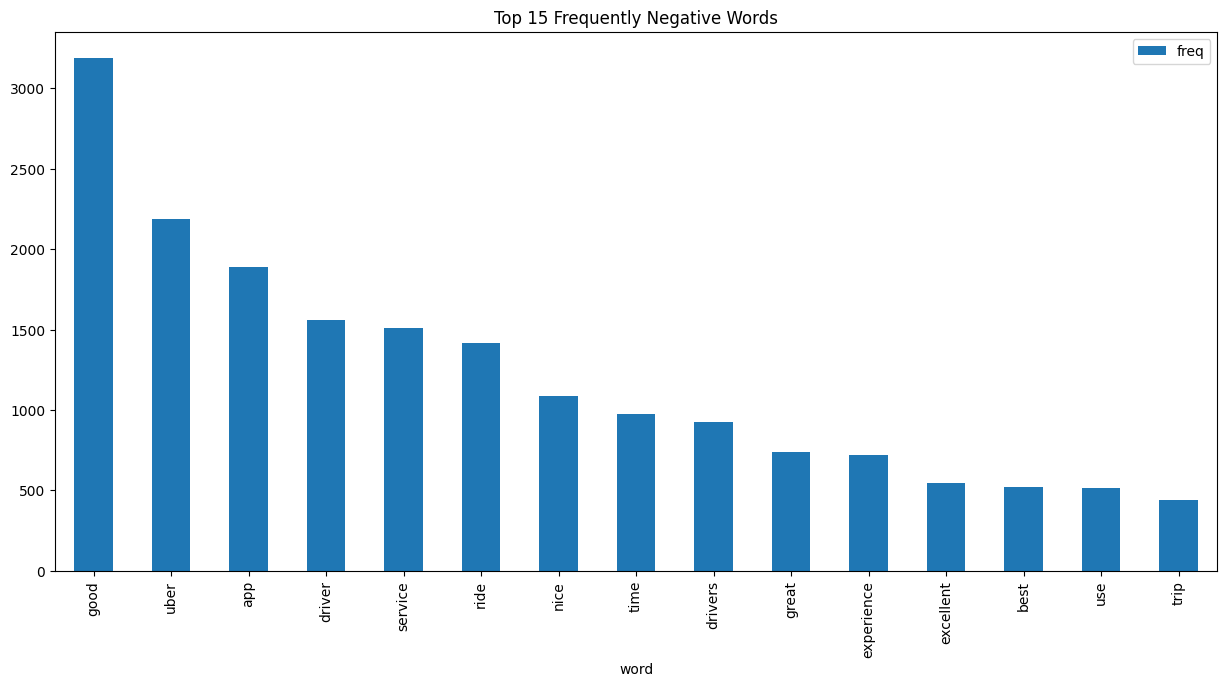

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Top 15 Frequently Negative Words")
print(frequency.head(15))

# **score**

繪製每個score的數量分布

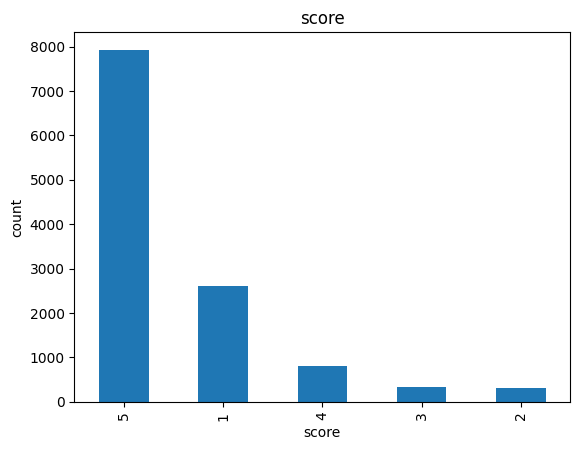

In [ ]:
df['score'].value_counts().plot.bar()
plt.title('score')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

# **thumbsUpCount**

繪製每個score收到的總讚數

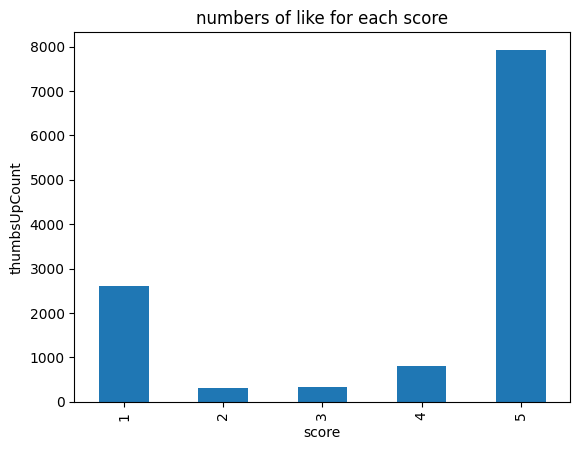

In [ ]:
df.groupby('score')['thumbsUpCount'].count().plot.bar()
plt.title("numbers of like for each score")
plt.xlabel('score')
plt.ylabel('thumbsUpCount')
plt.show()

# **reviewCreatedVersion**

統計使用者的APP版本

In [ ]:
df.reviewCreatedVersion.describe()

,reviewCreatedVersion
count,10260
unique,142
top,4.554.10001
freq,3187


In [ ]:
df['reviewCreatedVersion'].value_counts().head()

,count
reviewCreatedVersion,
4.554.10001,3187
4.555.10003,2327
4.556.10005,1699
4.553.10000,1667
4.552.10000,285


# **at**

統計使用者都在幾點評分

In [ ]:
pd.to_datetime(df['at']).dt.hour.value_counts()

,count
at,
22,667
19,631
20,626
16,616
21,601
17,578
13,575
18,567
11,560


統計評論時間是否為假日

In [ ]:
df['at'] = pd.to_datetime(df['at'])
df['is_weekend'] = df['at'].dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
df['is_weekend'].value_counts()

,count
is_weekend,
0,8804
1,3196


# **length**
評論的長度也可能會關係到評分的高低，所以我們在資料集中會新增評論長度的欄位-->length

In [ ]:
df['length'] = df['content'].apply(len)

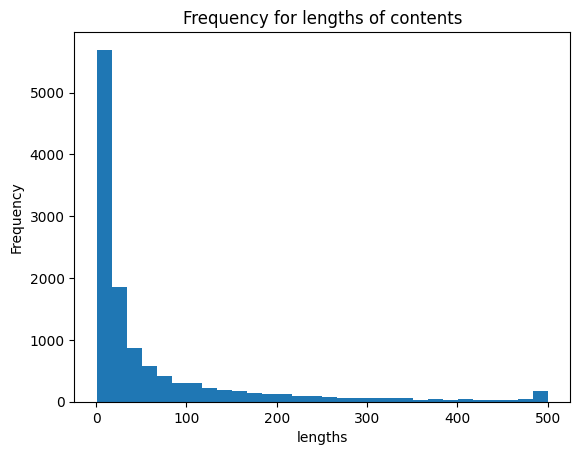

,length
count,12000.00000
mean,64.55325
std,102.41884
min,1.00000
25%,9.00000
50%,20.00000
75%,68.00000
max,500.00000


In [ ]:
df['length'].plot(bins=30, kind='hist')
plt.title('Frequency for lengths of contents')
plt.xlabel('lengths')
plt.ylabel('Frequency')
plt.show()

df.length.describe()

正面評論的長度

In [ ]:
positive.describe()

,score,thumbsUpCount,feedback
count,8732.000000,8732.000000,8732.0
mean,4.907696,0.076958,1.0
std,0.289471,2.563595,0.0
min,4.000000,0.000000,1.0
25%,5.000000,0.000000,1.0
50%,5.000000,0.000000,1.0
75%,5.000000,0.000000,1.0
max,5.000000,169.000000,1.0


負面評論的長度

In [ ]:
negative.describe()

,score,thumbsUpCount,feedback
count,3268.000000,3268.000000,3268.0
mean,1.300796,1.692778,0.0
std,0.643614,11.235160,0.0
min,1.000000,0.000000,0.0
25%,1.000000,0.000000,0.0
50%,1.000000,0.000000,0.0
75%,1.000000,0.000000,0.0
max,3.000000,239.000000,0.0


In [ ]:
print('正面評論的平均長度：',positive['content'].apply(len).mean(), '負面評論的平均長度：', negative['content'].apply(len).mean())

正面評論的平均長度： 28.145556573522676 負面評論的平均長度： 161.83353733170134


### **可以發現，正面評論的平均長度為28.1，而負面評論的平均長度為161.8，根據這個結果可以推論，對uber不滿意的用戶通常會寫更長的評論。**

# **Data Preprocessing**

In [ ]:
#對評論進行處理
def clean_text(text):
  text = re.sub(r'\W+', ' ', text).lower() # 轉成小寫字母
  text = text.translate(str.maketrans('', '', string.punctuation)) # 移除標點符號
  text = text.split()
  text = ' '.join(text) # 移除多餘空格

  return text

df['new_content'] = df['content'].map(clean_text)
df['new_content'].head(10)

,new_content
0,good
1,nice
2,very convenient
3,good
4,exllence
5,michelle was a very friendly and personable pe...
6,bast price pr car available
7,good service
8,awesome
9,nice


In [ ]:
# 處理缺失值
def handle_missing_values(df):
    # 使用中位數填充數值型欄位
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())

    # 使用眾數填充類別型欄位
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

In [ ]:
# 處理離群值
def handle_outliers(df, columns, n_std=3):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()

        df[column] = df[column].clip(
            lower=mean - n_std * std,
            upper=mean + n_std * std
        )
    return df

In [ ]:
df = handle_missing_values(df)
# 處理數值欄位中的離群值
numeric_columns = ['thumbsUpCount', 'length']
df = handle_outliers(df, numeric_columns)

In [ ]:
df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,at,feedback,is_weekend,length,new_content
2337,Uber very nice app,5,0.0,4.556.10005,2024-12-13 19:08:25,1,0,18.0,uber very nice app
11008,Unfamiliar transactions go off on my account f...,1,0.0,4.553.10000,2024-11-26 20:42:19,0,0,54.0,unfamiliar transactions go off on my account f...
7741,"As a first time user, the customer support sys...",1,0.0,4.554.10001,2024-12-02 18:37:14,0,0,127.0,as a first time user the customer support syst...
10072,Very friendly. Very punctual.,5,0.0,4.552.10000,2024-11-28 15:53:40,1,0,29.0,very friendly very punctual
8595,"Nice, comfortable drive to home",5,0.0,4.554.10001,2024-12-01 10:17:34,1,1,31.0,nice comfortable drive to home


In [ ]:
# 使用TF-IDF，文本特徵
vectorizer = TfidfVectorizer(max_features=2000)
text_fratures = vectorizer.fit_transform(df['new_content'])

In [ ]:
# 時間特徵處理
df['at'] = pd.to_datetime(df['at'])
df['hour'] = df['at'].dt.hour
df['day_of_week'] = df['at'].dt.dayofweek
df['year'] = df['at'].dt.year
df['month'] = df['at'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int) # 5,6 代表週末

# 將數值資料與時間特徵標準化
scaler = StandardScaler()
numeric_features = scaler.fit_transform(df[['thumbsUpCount', 'length', 'hour', 'day_of_week', 'year', 'month', 'is_weekend']])

In [ ]:
df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,at,feedback,is_weekend,length,new_content,hour,day_of_week,year,month
8913,One of the worst app which is not useful late ...,5,1.0,4.554.10001,2024-11-30 19:06:23,1,1,130.0,one of the worst app which is not useful late ...,19,5,2024,11
3312,Good,5,0.0,4.554.10001,2024-12-11 16:23:20,1,0,4.0,good,16,2,2024,12
10268,Excellent service,5,0.0,4.553.10000,2024-11-28 06:20:48,1,0,17.0,excellent service,6,3,2024,11
4752,Wonderful ride.,5,0.0,4.555.10003,2024-12-08 14:47:07,1,1,15.0,wonderful ride,14,6,2024,12
2151,Good,5,0.0,4.554.10001,2024-12-14 03:06:16,1,1,4.0,good,3,5,2024,12


In [ ]:
def data_preprocessing_Scaler(df, scaler = StandardScaler()):
  numeric_features = scaler.fit_transform(df[['thumbsUpCount', 'length', 'hour', 'day_of_week', 'year', 'month', 'is_weekend']])
  # 將文本特徵與數值特徵合併

  X = hstack((text_fratures, numeric_features))
  y = df['feedback']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Oversample the training dataset
  smote = SMOTE(random_state=42)
  X_sm, y_sm = smote.fit_resample(X_train, y_train)

  # 檢查平衡後的類別分布
  print("Original class distribution:", np.bincount(y_train))
  print("Balanced class distribution:", np.bincount(y_sm))
  return X_train, X_test, y_train, y_test, X_sm, y_sm

# 建立模型 (sklearn)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [ ]:
"""
# Oversample the training dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# 檢查平衡後的類別分布
print("Original class distribution:", np.bincount(y_train))
print("Balanced class distribution:", np.bincount(y_sm))
"""

'\n# Oversample the training dataset\nsmote = SMOTE(random_state=42)\nX_sm, y_sm = smote.fit_resample(X_train, y_train)\n\n# 檢查平衡後的類別分布\nprint("Original class distribution:", np.bincount(y_train))\nprint("Balanced class distribution:", np.bincount(y_sm))\n'

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original class distribution: [2634 6966]
Balanced class distribution: [6966 6966]
[[ 509  125]
 [  80 1686]]


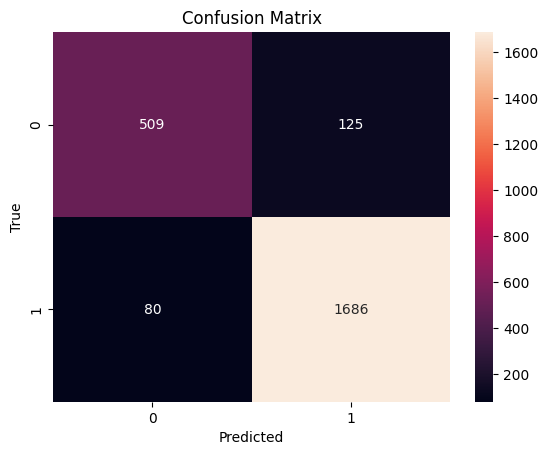

testing accuracy: 0.9145833333333333
testing precision: 0.9309773605742684
testing recall: 0.9546998867497168
testing f1 score: 0.9426894045289349
area under test roc 0.87876950173448


In [ ]:
X_train, X_test, y_train, y_test, X_sm, y_sm = data_preprocessing_Scaler(df)
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=50,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 測試集預測

#混淆矩陣
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#分析結果
print('testing accuracy:', accuracy_score(y_test, y_pred))
print('testing precision:', precision_score(y_test, y_pred))
print('testing recall:', recall_score(y_test, y_pred))
print('testing f1 score:', f1_score(y_test, y_pred))
print('area under test roc', roc_auc_score(y_test, y_pred)) #roc曲線下面積

[[ 538   96]
 [ 117 1649]]


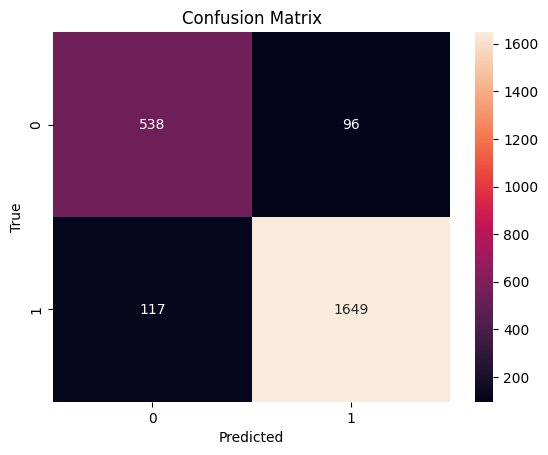

testing accuracy: 0.91125
testing precision: 0.9449856733524356
testing recall: 0.9337485843714609
testing f1 score: 0.9393335232127599
area under test roc 0.8911645130059198


In [ ]:
model = RandomForestClassifier(
    criterion='entropy',
    n_estimators=200,
    max_depth=50,
    random_state=42
)
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test) # 測試集預測

#混淆矩陣
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#分析結果
print('testing accuracy:', accuracy_score(y_test, y_pred))
print('testing precision:', precision_score(y_test, y_pred))
print('testing recall:', recall_score(y_test, y_pred))
print('testing f1 score:', f1_score(y_test, y_pred))
print('area under test roc', roc_auc_score(y_test, y_pred)) #roc曲線下面積

##Naive-Bayes

先前的StandardScaler將資料集中在零附近，並將其縮放到單位變異數，這可能會導致負值。然而MultinomialNB基於特徵代表頻率或計數的假設，而這些值不能為負數。
因此，匯入MinMaxScaler以取代StandardScaler。

In [ ]:
# 訓練一個 Naive-Bayes 分類器
from sklearn.naive_bayes import MultinomialNB
# 使用 MinMaxScaler 取代 StandardScaler，將數值特徵縮放到 0 到 1 的範圍
from sklearn.preprocessing import MinMaxScaler
"""
def data_preprocessing_MinMaxScaler(df):
  scaler = MinMaxScaler()
  # 使用 MinMaxScaler 縮放數值特徵
  numeric_features = scaler.fit_transform(df[['thumbsUpCount', 'length', 'hour', 'day_of_week', 'year', 'month', 'is_weekend']])
  # 將文本特徵與數值特徵合併

  X = hstack((text_fratures, numeric_features))
  y = df['feedback']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Oversample the training dataset
  smote = SMOTE(random_state=42)
  X_sm, y_sm = smote.fit_resample(X_train, y_train)

  # 檢查平衡後的類別分布
  print("Original class distribution:", np.bincount(y_train))
  print("Balanced class distribution:", np.bincount(y_sm))
  return X_train, X_test, y_train, y_test, X_sm, y_sm
"""

'\ndef data_preprocessing_MinMaxScaler(df):\n  scaler = MinMaxScaler()\n  # 使用 MinMaxScaler 縮放數值特徵\n  numeric_features = scaler.fit_transform(df[[\'thumbsUpCount\', \'length\', \'hour\', \'day_of_week\', \'year\', \'month\', \'is_weekend\']])\n  # 將文本特徵與數值特徵合併\n\n  X = hstack((text_fratures, numeric_features))\n  y = df[\'feedback\']\n  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n  # Oversample the training dataset\n  smote = SMOTE(random_state=42)\n  X_sm, y_sm = smote.fit_resample(X_train, y_train)\n\n  # 檢查平衡後的類別分布\n  print("Original class distribution:", np.bincount(y_train))\n  print("Balanced class distribution:", np.bincount(y_sm))\n  return X_train, X_test, y_train, y_test, X_sm, y_sm\n'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original class distribution: [2634 6966]
Balanced class distribution: [6966 6966]
condusion matrix:
 [[ 533  101]
 [  87 1679]]
Area under test roc : 0.8957150665747327
Testing Accuracy : 0.9216666666666666
Testing Precision : 0.9432584269662921
Testing Recall : 0.950736126840317
Testing f1-score : 0.9469825155104343


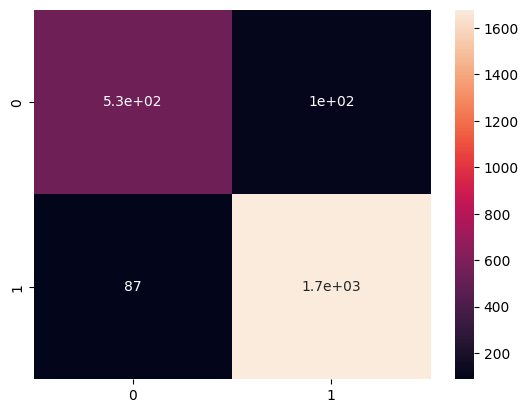

In [ ]:
X_train, X_test, y_train, y_test, X_sm, y_sm = data_preprocessing_Scaler(df, scaler = MinMaxScaler())
model = MultinomialNB()
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

condusion matrix:
 [[ 592   42]
 [ 152 1614]]
Area under test roc : 0.9238418640210638
Testing Accuracy : 0.9191666666666667
Testing Precision : 0.9746376811594203
Testing Recall : 0.9139297848244621
Testing f1-score : 0.9433080070134424


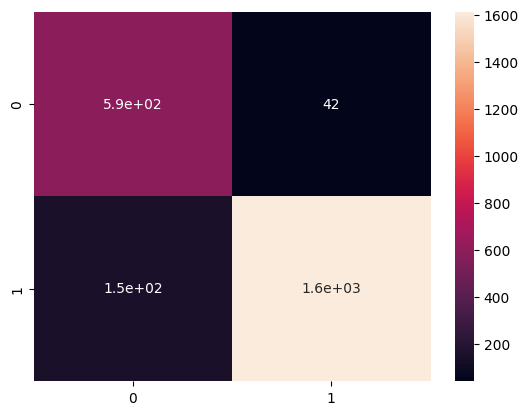

In [ ]:
# SMOTE oversampling
model =MultinomialNB()
model.fit(X_sm,y_sm)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

以下模型皆採用StandardScaler

In [ ]:
#恢復預設的StandardScaler
X_train, X_test, y_train, y_test, X_sm, y_sm = data_preprocessing_Scaler(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original class distribution: [2634 6966]
Balanced class distribution: [6966 6966]


##Logistic Regression

condusion matrix:
 [[ 532  102]
 [  58 1708]]
Area under test roc : 0.9031370685682234
Testing Accuracy : 0.9333333333333333
Testing Precision : 0.943646408839779
Testing Recall : 0.9671574178935447
Testing f1-score : 0.9552572706935123


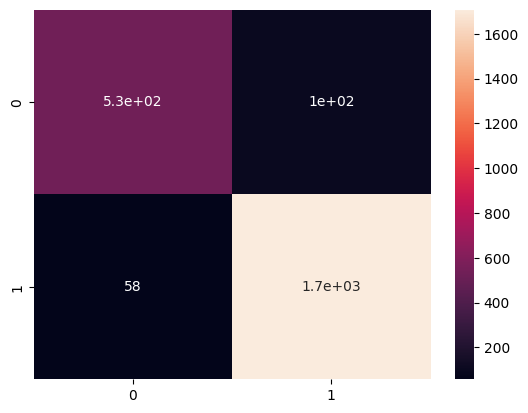

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


condusion matrix:
 [[ 554   80]
 [ 109 1657]]
Area under test roc : 0.9060478151984023
Testing Accuracy : 0.92125
Testing Precision : 0.953943580886586
Testing Recall : 0.9382785956964892
Testing f1-score : 0.946046246074793


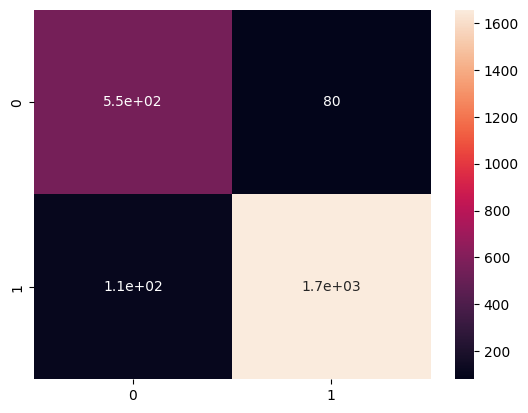

In [ ]:
# SMOTE oversampling
model = LogisticRegression(penalty = None,solver='lbfgs')
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

##Decision Tree

condusion matrix:
 [[ 503  131]
 [ 159 1607]]
Area under test roc : 0.8516707096184144
Testing Accuracy : 0.8791666666666667
Testing Precision : 0.9246260069044879
Testing Recall : 0.9099660249150623
Testing f1-score : 0.9172374429223744


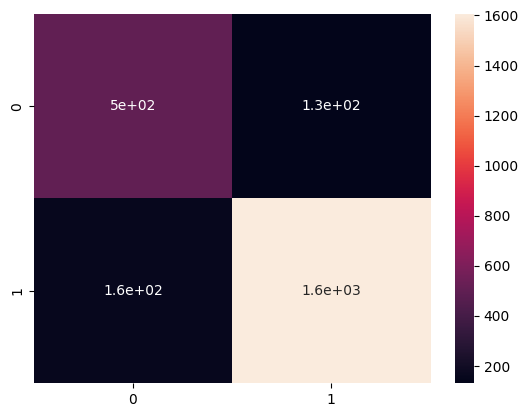

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

condusion matrix:
 [[ 500  134]
 [ 173 1593]]
Area under test roc : 0.8453410191096455
Testing Accuracy : 0.8720833333333333
Testing Precision : 0.9224088013896931
Testing Recall : 0.9020385050962627
Testing f1-score : 0.9121099341540223


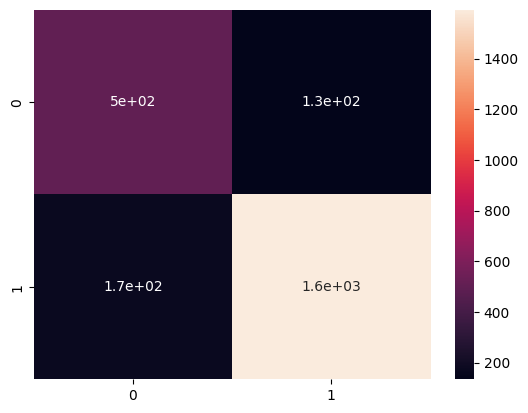

In [ ]:
# SMOTE oversampling
model = DecisionTreeClassifier(criterion='entropy',splitter='random')
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

##XGBoost


condusion matrix:
 [[ 527  107]
 [  71 1695]]
Area under test roc : 0.8955132167010228
Testing Accuracy : 0.9258333333333333
Testing Precision : 0.9406215316315205
Testing Recall : 0.9597961494903737
Testing f1-score : 0.9501121076233184


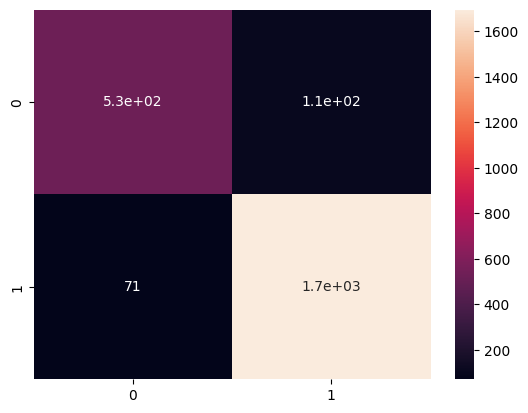

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

condusion matrix:
 [[ 553   81]
 [  96 1670]]
Area under test roc : 0.9089398058668647
Testing Accuracy : 0.92625
Testing Precision : 0.9537407195888064
Testing Recall : 0.9456398640996603
Testing f1-score : 0.9496730167756611


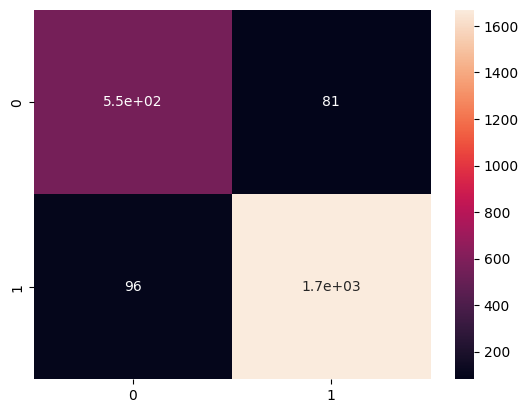

In [ ]:
# SMOTE oversampling
model = XGBClassifier()  # 如果用booster='dart'會跑很久不知道出不出得來
model.fit(X_sm, y_sm)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('condusion matrix:\n',cm)
sns.heatmap(cm, annot = True)
# Accuracy,Precision,Recall,F1-score
print('Area under test roc :',roc_auc_score(y_test,y_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))
print("Testing Precision :", precision_score(y_test, y_pred))
print("Testing Recall :", recall_score(y_test, y_pred))
print("Testing f1-score :", f1_score(y_test, y_pred))

##NLP with Neural Nets

# BERT

In [ ]:
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,length,new_content,hour,day_of_week,year,month,is_weekend,sentiment,label,combined_feature
0,Good,5,0.0,4.556.10005,2024-12-18 17:17:19,4.0,good,17,2,2024,12,0,positive,1,good 0.0 4.0
1,Nice,5,0.0,4.556.10005,2024-12-18 17:17:17,4.0,nice,17,2,2024,12,0,positive,1,nice 0.0 4.0
2,Very convenient,5,0.0,4.532.10001,2024-12-18 17:09:42,15.0,very convenient,17,2,2024,12,0,positive,1,very convenient 0.0 15.0
3,Good,4,0.0,4.556.10005,2024-12-18 17:08:27,4.0,good,17,2,2024,12,0,positive,1,good 0.0 4.0
4,exllence,5,0.0,4.556.10005,2024-12-18 17:08:16,8.0,exllence,17,2,2024,12,0,positive,1,exllence 0.0 8.0


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
class UberDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
# 將評論長度與標籤新增進資料集
# 生成情感標籤 (sentiment)
def map_score_to_sentiment(score):
    return "positive" if score >= 4 else "negative"

df['sentiment'] = df['score'].apply(map_score_to_sentiment)

# 將 sentiment 轉換為數值標籤
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

# 結合額外特徵 (文本特徵 + 數值特徵)
df['combined_feature'] = df['new_content'] + " " + df['thumbsUpCount'].astype(str) + " " + df['length'].astype(str)

# 分成訓練集和測試集
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['new_content'], df['label'], test_size=0.2, random_state=42
)

#使用 TF-IDF 向量化文本數據
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_texts_tfidf = tfidf_vectorizer.fit_transform(train_texts)

# 定義分詞器和最大序列長度
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN = 128

# 建立 Dataset
train_dataset = UberDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, MAX_LEN)
test_dataset = UberDataset(test_texts.tolist(), test_labels.tolist(), tokenizer, MAX_LEN)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# 重採樣以平衡類別
ros = RandomOverSampler(random_state=42)
train_texts_resampled, train_labels_resampled = ros.fit_resample(
    train_texts.values.reshape(-1, 1), train_labels
)
train_texts_resampled = pd.Series(train_texts_resampled.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
#使用 SMOTE 平衡數據
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_texts_resampled, train_labels_resampled = smote.fit_resample(train_texts_tfidf, train_labels)

# 確保數據格式兼容
train_texts_resampled = train_texts_resampled.toarray()  # 轉成數組


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## 構建 BERT 模型
使用 Hugging Face 的 BertForSequenceClassification

In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW

# 初始化模型
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2  # 二分類
)

# 定義優化器
optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 定義訓練和評估函數

### 訓練函數

In [ ]:
from tqdm import tqdm

def train_epoch_with_progress(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0

    # 使用 tqdm 包裝 DataLoader，顯示進度條
    loop = tqdm(data_loader, desc="Training", leave=True)

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # 前向傳播
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # 更新損失
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)

        # 反向傳播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 更新進度條描述
        loop.set_postfix(loss=loss.item(), accuracy=correct_predictions.double() / len(data_loader.dataset))

    return correct_predictions.double() / len(data_loader.dataset), total_loss / len(data_loader)


### 評估函數

In [ ]:
# 評估函數
def evaluate(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # 前向傳播
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            # 更新損失和準確率
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)

    return correct_predictions.double() / len(data_loader.dataset), total_loss / len(data_loader)


## 訓練與測試模型

In [ ]:
import torch
print(torch.cuda.is_available())  # 應返回 True
print(torch.cuda.device_count())  # 應顯示可用 GPU 的數量


True
1


In [ ]:
from torch.utils.data import DataLoader

# 設定設備
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 建立 DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 訓練模型
EPOCHS = 5
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    # 訓練模型
    train_acc, train_loss = train_epoch_with_progress(model, train_loader, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc.item())

    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}")

    # 評估模型
    val_acc, val_loss = evaluate(model, test_loader, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc.item())

    print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}")


Epoch 1/5


Training: 100%|██████████| 600/600 [01:45<00:00,  5.68it/s, accuracy=tensor(0.9384, device='cuda:0', dtype=torch.float64), loss=0.249]


Train loss: 0.1851, Train accuracy: 0.9384
Validation loss: 0.1439, Validation accuracy: 0.9517
Epoch 2/5


Training: 100%|██████████| 600/600 [01:45<00:00,  5.71it/s, accuracy=tensor(0.9647, device='cuda:0', dtype=torch.float64), loss=0.0238]


Train loss: 0.1185, Train accuracy: 0.9647
Validation loss: 0.1632, Validation accuracy: 0.9525
Epoch 3/5


Training: 100%|██████████| 600/600 [01:45<00:00,  5.71it/s, accuracy=tensor(0.9761, device='cuda:0', dtype=torch.float64), loss=0.193]


Train loss: 0.0875, Train accuracy: 0.9761
Validation loss: 0.1527, Validation accuracy: 0.9583
Epoch 4/5


Training: 100%|██████████| 600/600 [01:45<00:00,  5.71it/s, accuracy=tensor(0.9813, device='cuda:0', dtype=torch.float64), loss=0.233]


Train loss: 0.0704, Train accuracy: 0.9813
Validation loss: 0.1562, Validation accuracy: 0.9583
Epoch 5/5


Training: 100%|██████████| 600/600 [01:45<00:00,  5.71it/s, accuracy=tensor(0.9853, device='cuda:0', dtype=torch.float64), loss=0.243]


Train loss: 0.0596, Train accuracy: 0.9853
Validation loss: 0.1814, Validation accuracy: 0.9550


### 測試模型

In [ ]:
# 測試模型
test_acc, test_loss = evaluate(model, test_loader, device)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


Test loss: 0.1814, Test accuracy: 0.9550


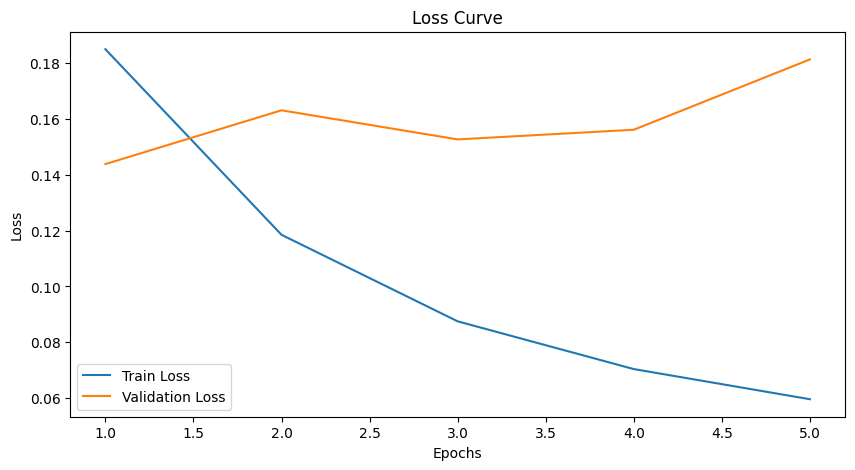

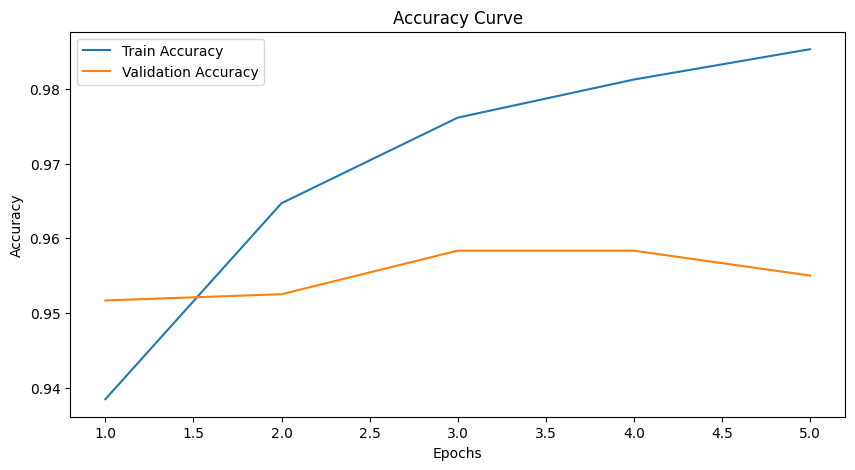

In [ ]:
import matplotlib.pyplot as plt
# 繪製損失圖
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS + 1), train_losses, label="Train Loss")
plt.plot(range(1, EPOCHS + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# 繪製準確率圖
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, EPOCHS + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

Confusion Matrix:
[[ 565   69]
 [  39 1727]]


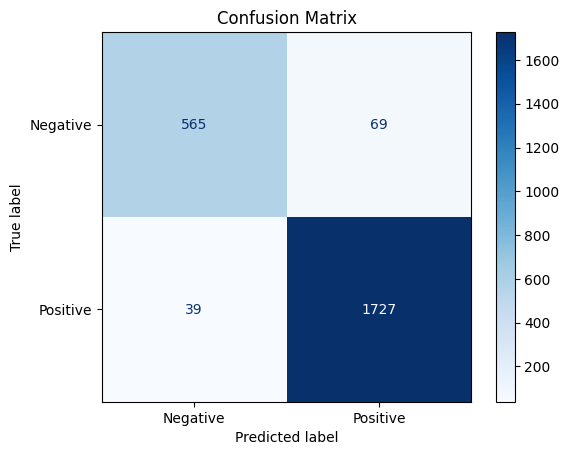

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 獲取真實標籤和預測結果
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].cpu().numpy()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

        all_labels.extend(labels)
        all_preds.extend(preds)

# 計算混淆矩陣
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)
'''
# 顯示分類報告
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))
'''
# 繪製混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Area under test ROC: 0.9582
Testing Accuracy: 0.9550
Testing Precision: 0.9616
Testing Recall: 0.9779
Testing F1-score: 0.9697


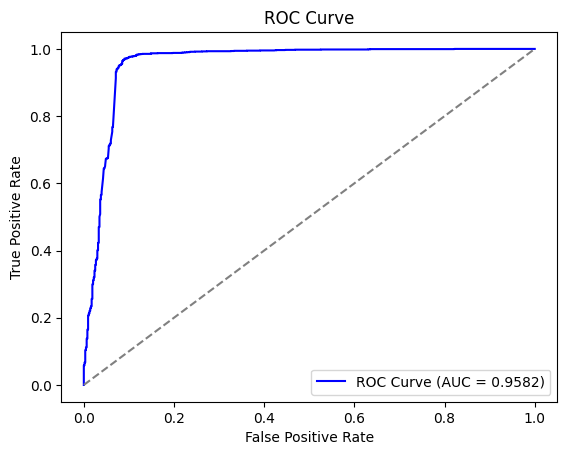

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 收集模型的預測結果與真實標籤
all_labels = []
all_preds = []
all_probs = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].cpu().numpy()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()  # 獲取正類的概率
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        all_labels.extend(labels)
        all_preds.extend(preds)
        all_probs.extend(probs)

#計算 AUC
auc = roc_auc_score(all_labels, all_probs)
print(f"Area under test ROC: {auc:.4f}")

#計算 Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Testing Accuracy: {accuracy:.4f}")

#計算 Precision, Recall, F1-Score
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Testing Precision: {precision:.4f}")
print(f"Testing Recall: {recall:.4f}")
print(f"Testing F1-score: {f1:.4f}")

#繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# ALBERT

In [ ]:
df.tail()

,content,score,thumbsUpCount,reviewCreatedVersion,at,feedback,is_weekend,length,new_content,hour,day_of_week,year,month
11995,Excellent!!!,5,0.0,4.553.10000,2024-11-24 21:59:16,1,1,12.0,excellent,21,6,2024,11
11996,Worst experience after 10pm in Hyde cityno aut...,5,0.0,4.552.10000,2024-11-24 21:56:10,1,1,62.0,worst experience after 10pm in hyde cityno aut...,21,6,2024,11
11997,Exceptional,5,0.0,4.552.10000,2024-11-24 21:52:21,1,1,11.0,exceptional,21,6,2024,11
11998,Good Service.,5,0.0,4.553.10000,2024-11-24 21:50:30,1,1,13.0,good service,21,6,2024,11
11999,"Very bad experience with this app, booked a sh...",1,0.0,4.554.10001,2024-11-24 21:44:44,0,1,177.0,very bad experience with this app booked a sho...,21,6,2024,11


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AlbertTokenizer, AlbertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

In [ ]:
# 資料前處理
# 將score作為情感標籤 (1為負面, 5為正面)
def map_score_to_sentiment(score):
    return "positive" if score >= 4 else "negative"

df['sentiment'] = df['score'].apply(map_score_to_sentiment)

# 標籤編碼
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# 結合額外特徵
df['combined_feature'] = df['new_content'] + " " + df['thumbsUpCount'].astype(str) + " " + df['length'].astype(str)

In [ ]:
df.tail()

,content,score,thumbsUpCount,reviewCreatedVersion,at,feedback,is_weekend,length,new_content,hour,day_of_week,year,month,sentiment,label,combined_feature
11995,Excellent!!!,5,0.0,4.553.10000,2024-11-24 21:59:16,1,1,12.0,excellent,21,6,2024,11,positive,1,excellent 0.0 12.0
11996,Worst experience after 10pm in Hyde cityno aut...,5,0.0,4.552.10000,2024-11-24 21:56:10,1,1,62.0,worst experience after 10pm in hyde cityno aut...,21,6,2024,11,positive,1,worst experience after 10pm in hyde cityno aut...
11997,Exceptional,5,0.0,4.552.10000,2024-11-24 21:52:21,1,1,11.0,exceptional,21,6,2024,11,positive,1,exceptional 0.0 11.0
11998,Good Service.,5,0.0,4.553.10000,2024-11-24 21:50:30,1,1,13.0,good service,21,6,2024,11,positive,1,good service 0.0 13.0
11999,"Very bad experience with this app, booked a sh...",1,0.0,4.554.10001,2024-11-24 21:44:44,0,1,177.0,very bad experience with this app booked a sho...,21,6,2024,11,negative,0,very bad experience with this app booked a sho...


In [ ]:
# 訓練/測試資料分割
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['combined_feature'], df['label'], test_size=0.2, random_state=42
)

In [ ]:
# 重採樣以平衡類別
ros = RandomOverSampler(random_state=42)
train_texts_resampled, train_labels_resampled = ros.fit_resample(
    train_texts.values.reshape(-1, 1), train_labels
)
train_texts_resampled = pd.Series(train_texts_resampled.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 初始化 TF-IDF 向量器
vectorizer = TfidfVectorizer(max_features=2000)

# 將文本數據轉換為數值表示
train_texts_numeric = vectorizer.fit_transform(train_texts)

# 使用 SMOTE 平衡數據
smote = SMOTE(random_state=42)
train_texts_resampled_numeric, train_labels_resampled_sm = smote.fit_resample(
    train_texts_numeric, train_labels
)

# 還原文本格式
train_texts_resampled_sm = pd.Series(
    [' '.join(text) for text in vectorizer.inverse_transform(train_texts_resampled_numeric)]
)

# 檢查結果
print("Example of SMOTE-augmented text:")
print(train_texts_resampled_sm.iloc[0])
print("Resampled data count:", len(train_texts_resampled_sm), len(train_labels_resampled_sm))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Example of SMOTE-augmented text:
today rider was best 24
Resampled data count: 13932 13932


In [ ]:
# 初始化 Hugging Face 的 ALBERT Tokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

In [ ]:
# 自訂 Dataset 類別
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
# 創建 Dataset
train_dataset = SentimentDataset(train_texts_resampled, train_labels_resampled, tokenizer)
train_dataset_sm = SentimentDataset(train_texts_resampled_sm, train_labels_resampled_sm, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

In [ ]:
# 初始化模型
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=len(label_encoder.classes_))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertSdpaAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=

In [ ]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
train_loader_sm = DataLoader(train_dataset_sm, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 優化器與損失函數
optimizer = AdamW(model.parameters(), lr=3e-5)
loss_fn = CrossEntropyLoss()

## Original

In [ ]:
# 訓練函式
def train_model(model, train_loader, optimizer, loss_fn, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# 執行訓練
train_model(model, train_loader, optimizer, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [05:09<00:00,  2.81it/s]


Epoch 1, Loss: 0.2062298398588952


Training Epoch 2: 100%|██████████| 871/871 [05:12<00:00,  2.79it/s]


Epoch 2, Loss: 0.1536573658801025


Training Epoch 3: 100%|██████████| 871/871 [05:12<00:00,  2.79it/s]


Epoch 3, Loss: 0.1251703856746002


Training Epoch 4: 100%|██████████| 871/871 [05:12<00:00,  2.79it/s]


Epoch 4, Loss: 0.10752551225532621


Training Epoch 5: 100%|██████████| 871/871 [05:12<00:00,  2.79it/s]

Epoch 5, Loss: 0.10211094735157125


In [ ]:
# 評估模型
model.eval()

AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertSdpaAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=

In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())

Confusion Matrix:
 [[ 587   47]
 [  90 1676]]


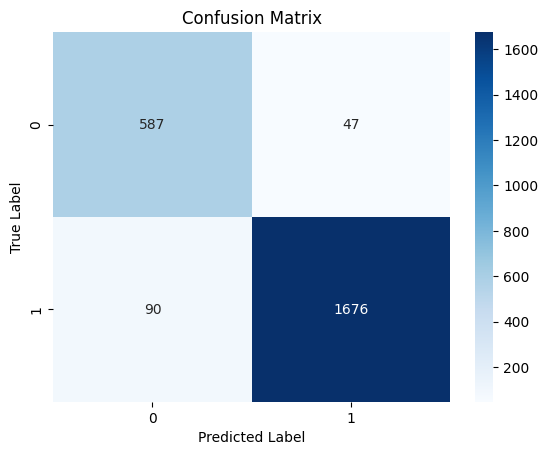

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.9374524402399333
Testing Accuracy: 0.9429166666666666
Testing Precision: 0.9727219965177016
Testing Recall: 0.9490373725934315
Testing F1-score: 0.9607337345944397


## SMOTE

In [ ]:
# 執行訓練
train_model(model, train_loader_sm, optimizer, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [04:50<00:00,  3.00it/s]


Epoch 1, Loss: 0.2443493791769262


Training Epoch 2: 100%|██████████| 871/871 [04:53<00:00,  2.97it/s]


Epoch 2, Loss: 0.20383476444555343


Training Epoch 3: 100%|██████████| 871/871 [04:54<00:00,  2.96it/s]


Epoch 3, Loss: 0.17140573118390978


Training Epoch 4: 100%|██████████| 871/871 [04:52<00:00,  2.97it/s]


Epoch 4, Loss: 0.14642495004434553


Training Epoch 5: 100%|██████████| 871/871 [04:52<00:00,  2.97it/s]

Epoch 5, Loss: 0.13311091404681946


In [ ]:
# 評估模型
model.eval()

AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertSdpaAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=

In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())

Confusion Matrix:
 [[ 607   27]
 [ 263 1503]]


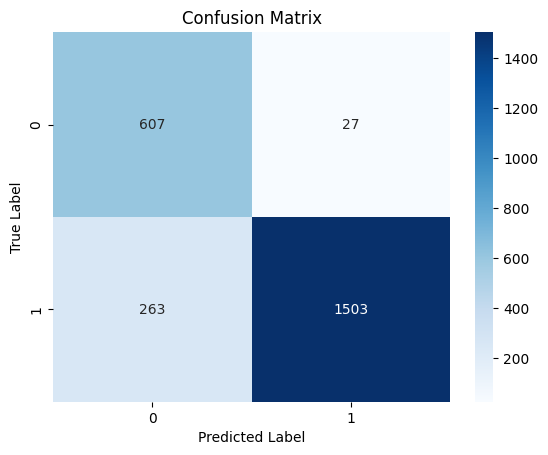

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.9042445634505253
Testing Accuracy: 0.8791666666666667
Testing Precision: 0.9823529411764705
Testing Recall: 0.8510758776896942
Testing F1-score: 0.9120145631067961


# DistilBERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

In [ ]:
# 初始化 DistilBERT Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# 創建 Dataset
train_dataset = SentimentDataset(train_texts_resampled, train_labels_resampled, tokenizer)
train_dataset_sm = SentimentDataset(train_texts_resampled_sm, train_labels_resampled_sm, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

In [ ]:
# 載入 DistilBERT 模型
model_distilbert = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_distilbert.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
train_loader_sm = DataLoader(train_dataset_sm, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 優化器與損失函數
optimizer_distilbert = AdamW(model_distilbert.parameters(), lr=5e-5)
loss_fn = CrossEntropyLoss()

In [ ]:
# 使用批次累積
def train_distilbert_model(model, train_loader, optimizer, loss_fn, device, epochs=5, accumulation_steps=2):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        optimizer.zero_grad()

        for step, batch in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch+1}")):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss / accumulation_steps
            total_loss += loss.item()

            loss.backward()

            if (step + 1) % accumulation_steps == 0 or step == len(train_loader) - 1:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # 梯度剪裁
                optimizer.step()
                optimizer.zero_grad()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

## Original

In [ ]:
# 訓練 DistilBERT 模型
train_distilbert_model(model_distilbert, train_loader, optimizer_distilbert, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [02:25<00:00,  5.97it/s]


Epoch 1, Loss: 0.09530643676220515


Training Epoch 2: 100%|██████████| 871/871 [02:27<00:00,  5.90it/s]


Epoch 2, Loss: 0.057273480639152496


Training Epoch 3: 100%|██████████| 871/871 [02:27<00:00,  5.91it/s]


Epoch 3, Loss: 0.04004858322182283


Training Epoch 4: 100%|██████████| 871/871 [02:27<00:00,  5.92it/s]


Epoch 4, Loss: 0.03477849472060438


Training Epoch 5: 100%|██████████| 871/871 [02:27<00:00,  5.91it/s]

Epoch 5, Loss: 0.03043481403984232


In [ ]:
# 評估模型
model_distilbert.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_distilbert(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())


Confusion Matrix:
 [[ 574   60]
 [  44 1722]]


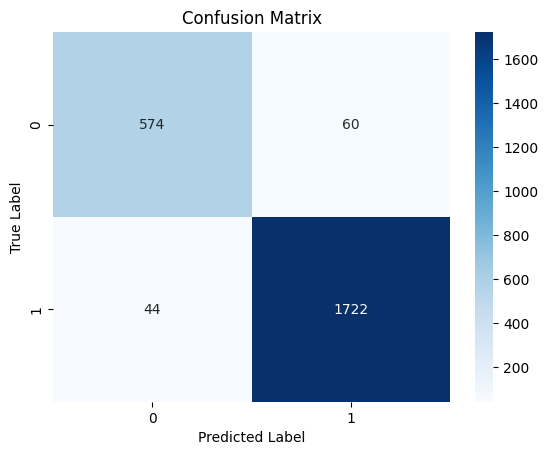

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.9402238568687904
Testing Accuracy: 0.9566666666666667
Testing Precision: 0.9663299663299664
Testing Recall: 0.9750849377123443
Testing F1-score: 0.9706877113866967


## SMOTE

In [ ]:
# 訓練 DistilBERT 模型
train_distilbert_model(model_distilbert, train_loader_sm, optimizer_distilbert, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [02:19<00:00,  6.26it/s]


Epoch 1, Loss: 0.10446980529669009


Training Epoch 2: 100%|██████████| 871/871 [02:18<00:00,  6.27it/s]


Epoch 2, Loss: 0.0660868929749853


Training Epoch 3: 100%|██████████| 871/871 [02:18<00:00,  6.28it/s]


Epoch 3, Loss: 0.04797099278151805


Training Epoch 4: 100%|██████████| 871/871 [02:18<00:00,  6.27it/s]


Epoch 4, Loss: 0.03898849515007792


Training Epoch 5: 100%|██████████| 871/871 [02:18<00:00,  6.28it/s]

Epoch 5, Loss: 0.033019254696552765


In [ ]:
# 評估模型
model_distilbert.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_distilbert(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())

Confusion Matrix:
 [[ 611   23]
 [ 424 1342]]


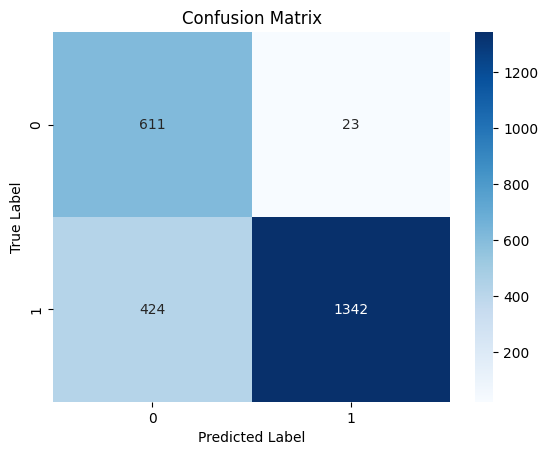

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.8618158986249201
Testing Accuracy: 0.81375
Testing Precision: 0.9831501831501831
Testing Recall: 0.7599093997734995
Testing F1-score: 0.8572341105078249


# XLNet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import XLNetTokenizer, XLNetForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from tqdm import tqdm
from transformers import get_scheduler

In [ ]:
# 初始化 Hugging Face 的 XLNet Tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
# 創建 Dataset
train_dataset = SentimentDataset(train_texts_resampled, train_labels_resampled, tokenizer)
train_dataset_sm = SentimentDataset(train_texts_resampled_sm, train_labels_resampled_sm, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

In [ ]:
# 初始化模型
model_xlnet = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=len(label_encoder.classes_))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_xlnet.to(device)

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [ ]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
train_loader_sm = DataLoader(train_dataset_sm, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 優化器與損失函數
optimizer_xlnet = AdamW(model_xlnet.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# 使用學習率暖啟動與梯度裁剪
def train_xlnet_model(model, train_loader, optimizer, loss_fn, device, epochs=5):
    num_training_steps = len(train_loader) * epochs
    lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
    model.train()

    for epoch in range(epochs):
        total_loss = 0
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # 梯度剪裁
            optimizer.step()
            lr_scheduler.step()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

## Original

In [ ]:
# 執行訓練
train_xlnet_model(model_xlnet, train_loader, optimizer_xlnet, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [06:35<00:00,  2.20it/s]


Epoch 1, Loss: 0.24424949448168637


Training Epoch 2: 100%|██████████| 871/871 [06:36<00:00,  2.20it/s]


Epoch 2, Loss: 0.1699061983411471


Training Epoch 3: 100%|██████████| 871/871 [06:35<00:00,  2.20it/s]


Epoch 3, Loss: 0.14647181230531972


Training Epoch 4: 100%|██████████| 871/871 [06:35<00:00,  2.20it/s]


Epoch 4, Loss: 0.13084718792610528


Training Epoch 5: 100%|██████████| 871/871 [06:36<00:00,  2.20it/s]

Epoch 5, Loss: 0.11607900706048195


In [ ]:
# 評估模型
model_xlnet.eval()

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_xlnet(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())

Confusion Matrix:
 [[ 573   61]
 [  57 1709]]


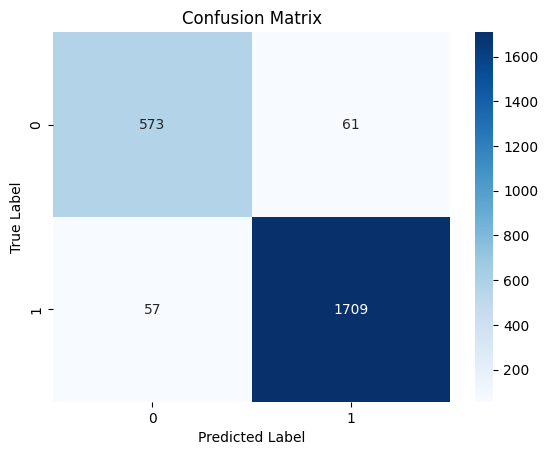

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.935754579134082
Testing Accuracy: 0.9508333333333333
Testing Precision: 0.9655367231638418
Testing Recall: 0.9677236693091733
Testing F1-score: 0.9666289592760181


## SMOTE

In [ ]:
# 執行訓練
train_xlnet_model(model_xlnet, train_loader_sm, optimizer_xlnet, loss_fn, device, epochs=5)

Training Epoch 1: 100%|██████████| 871/871 [06:13<00:00,  2.33it/s]


Epoch 1, Loss: 0.2669833337850163


Training Epoch 2: 100%|██████████| 871/871 [06:12<00:00,  2.34it/s]


Epoch 2, Loss: 0.2003764245096684


Training Epoch 3: 100%|██████████| 871/871 [06:12<00:00,  2.34it/s]


Epoch 3, Loss: 0.17711935975363244


Training Epoch 4: 100%|██████████| 871/871 [06:12<00:00,  2.34it/s]


Epoch 4, Loss: 0.1675144872798164


Training Epoch 5: 100%|██████████| 871/871 [06:12<00:00,  2.34it/s]

Epoch 5, Loss: 0.1499593655849314


In [ ]:
# 評估模型
model_xlnet.eval()

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [ ]:
y_pred = []
y_test = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_xlnet(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(predictions.cpu().numpy())
        y_test.extend(labels.cpu().numpy())

Confusion Matrix:
 [[ 608   26]
 [ 322 1444]]


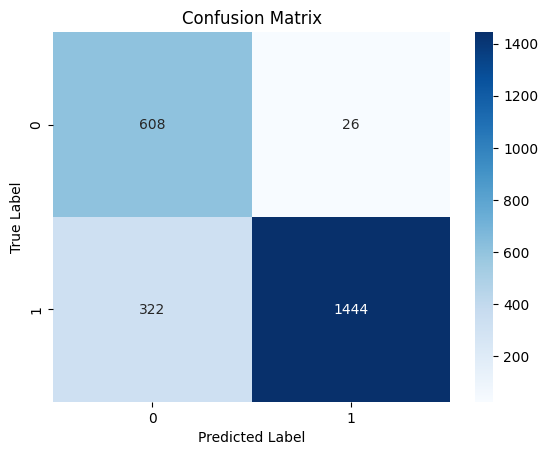

In [ ]:
# 計算 Confusion Matrix 和性能指標
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 計算 Accuracy, Precision, Recall, F1-score 和 ROC-AUC
print("Area under test ROC:", roc_auc_score(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Precision:", precision_score(y_test, y_pred))
print("Testing Recall:", recall_score(y_test, y_pred))
print("Testing F1-score:", f1_score(y_test, y_pred))

Area under test ROC: 0.8883287902226065
Testing Accuracy: 0.855
Testing Precision: 0.9823129251700681
Testing Recall: 0.8176670441676104
Testing F1-score: 0.892459826946848
